In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans


In [2]:
df=pd.read_csv(r'C:\Users\Shrija Shetty\Downloads\Mall_Customers.csv',header=0,index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
#df.Gender=df.Gender.map({'Female':0,'Male':1})
df
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [48]:
df.shape
df.info
df.isnull().sum()
#df.describe(include='all')

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [49]:
X=df.values[:,(2,3)]
X

array([[15, 39],
       [15, 81],
       [16, 6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18, 6],
       [18, 94],
       [19, 3],
       [19, 72],
       [19, 14],
       [19, 99],
       [20, 15],
       [20, 77],
       [20, 13],
       [20, 79],
       [21, 35],
       [21, 66],
       [23, 29],
       [23, 98],
       [24, 35],
       [24, 73],
       [25, 5],
       [25, 73],
       [28, 14],
       [28, 82],
       [28, 32],
       [28, 61],
       [29, 31],
       [29, 87],
       [30, 4],
       [30, 73],
       [33, 4],
       [33, 92],
       [33, 14],
       [33, 81],
       [34, 17],
       [34, 73],
       [37, 26],
       [37, 75],
       [38, 35],
       [38, 92],
       [39, 36],
       [39, 61],
       [39, 28],
       [39, 65],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51],
   

C:\Users\Shrija Shetty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


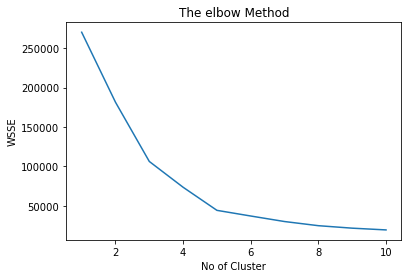

In [50]:
#using the elbow method to find the optimal no of clusters
#from sklearn.cluster import kmeans\

wsse=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1,11),wsse)
#plt.scatter(range(1,11),wsse)
plt.title('The elbow Method')
plt.xlabel('No of Cluster')
plt.ylabel('WSSE')
plt.show()

In [56]:
kmeans=KMeans(n_clusters=5,random_state=10)
y_pred=kmeans.fit_predict(X)
y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [57]:
kmeans.n_iter_

5

In [58]:
df['Cluster']=y_pred
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3
...,...,...,...,...,...
196,Female,35,120,79,2
197,Female,45,126,28,4
198,Male,32,126,74,2


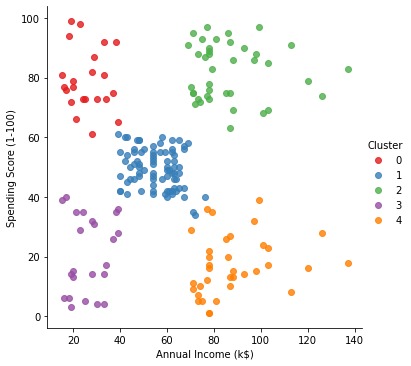

In [59]:
sns.lmplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',fit_reg=False,hue='Cluster',palette='Set1')

In [19]:
df['Cluster']=df['Cluster'].map({0:'ok-Standard',1:'Standard',2:'Most sensible',3:'very Careless',4:'Very Careful'})
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,,
1,Male,19,15,39,very Careless
2,Male,21,15,81,ok-Standard
3,Female,20,16,6,very Careless
4,Female,23,16,77,ok-Standard
5,Female,31,17,40,very Careless
...,...,...,...,...,...
196,Female,35,120,79,Most sensible
197,Female,45,126,28,Very Careful
198,Male,32,126,74,Most sensible


In [29]:
new_df=df[df['Cluster']=='Most sensible']
new_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,,
124,Male,39,69,91,Most sensible
126,Female,31,70,77,Most sensible
128,Male,40,71,95,Most sensible
130,Male,38,71,75,Most sensible
132,Male,39,71,75,Most sensible
134,Female,31,72,71,Most sensible
136,Female,29,73,88,Most sensible
138,Male,32,73,73,Most sensible
140,Female,35,74,72,Most sensible


In [30]:
new_df.to_excel(r'TargetCsutomers.xlsx',index=True)